In [1]:
import pandas as pd
import numpy as np
import matplotlib; matplotlib.rc('font', family='Malgun Gothic')
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings; warnings.filterwarnings('ignore')

plt.style.use('ggplot')

- id: 확진자의 id (n번째 확진자)
- sex: 성별
- birth_year: 출생 연도
- country: 국적
- region: 주 활동 지역 (광역시/도 단위)
- group: 특정 집단 관련
- infection_reason: 감염 경로
- infection_order: 감염 차수 (n차 감염)
- infected_by: 해당 확진자의 감염원 id
- contact_number: 접촉자 수
- confirmed_date: 확진 일자
- released_date: 퇴원 일자 (격리 해제 일자)
- deceased_date: 사망 일자
- state: 상태

In [4]:
raw_df = pd.read_csv('./data/patient.csv')
print(raw_df.shape)
raw_df.head()

(6285, 14)


,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1.0,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2.0,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3.0,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4.0,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5.0,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6285 entries, 0 to 6284
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6284 non-null   float64
 1   sex               421 non-null    object 
 2   birth_year        408 non-null    float64
 3   country           6283 non-null   object 
 4   region            409 non-null    object 
 5   group             83 non-null     object 
 6   infection_reason  146 non-null    object 
 7   infection_order   35 non-null     float64
 8   infected_by       70 non-null     float64
 9   contact_number    50 non-null     float64
 10  confirmed_date    6284 non-null   object 
 11  released_date     38 non-null     object 
 12  deceased_date     23 non-null     object 
 13  state             6284 non-null   object 
dtypes: float64(5), object(9)
memory usage: 687.5+ KB


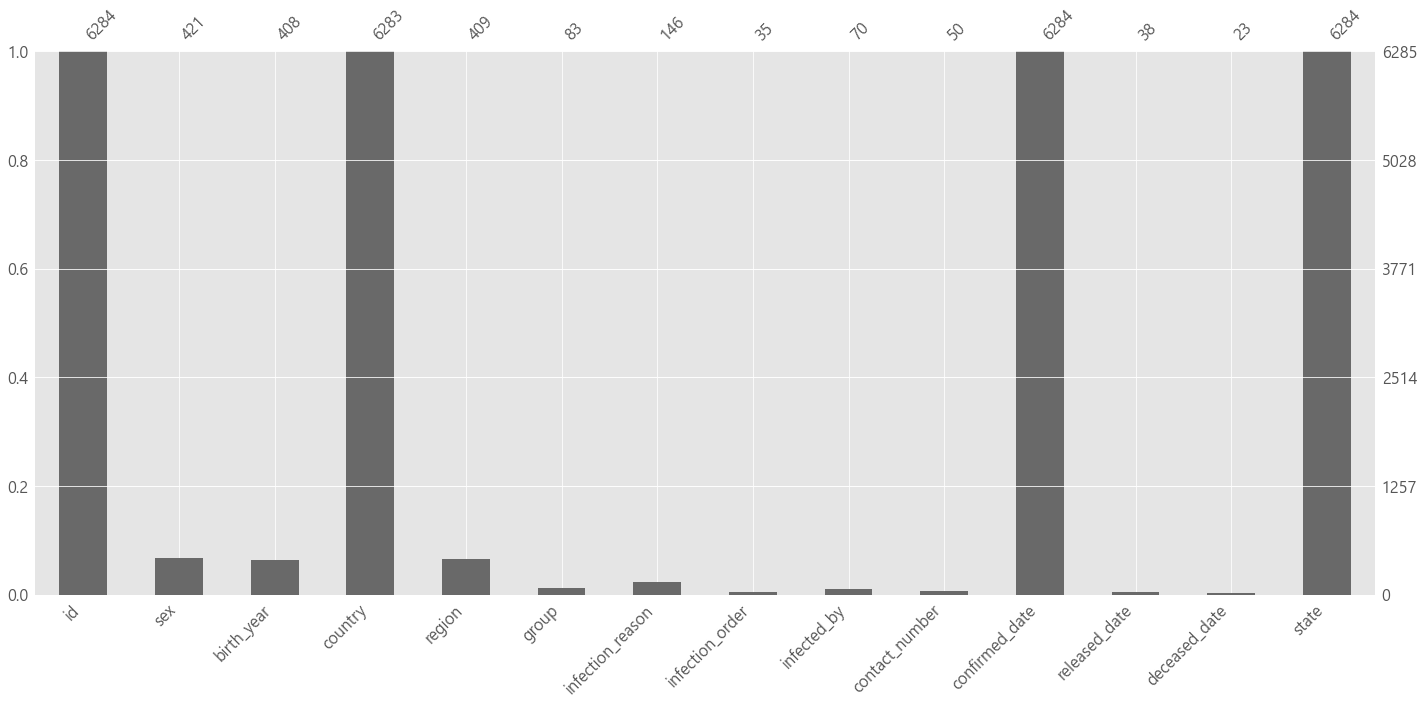

In [6]:
msno.bar(raw_df)

-> 결측치가 많다.

In [7]:
raw_df.describe(include='all')

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
count,6284.000000,421,408.000000,6283,409,83,146,35.000000,70.000000,50.000000,6284,38,23,6284
unique,NaN,2,NaN,3,14,6,15,NaN,NaN,NaN,31,19,12,3
top,NaN,female,NaN,Korea,capital area,Shincheonji Church,contact with patient,NaN,NaN,NaN,2020-03-01,2020-02-24,2020-02-23,isolated
freq,NaN,214,NaN,6274,191,53,75,NaN,NaN,NaN,1062,4,4,6221
mean,3142.500000,NaN,1974.198529,NaN,NaN,NaN,NaN,2.285714,379.000000,69.400000,NaN,NaN,NaN,NaN
std,1814.178878,NaN,17.596133,NaN,NaN,NaN,NaN,1.405272,540.247528,182.876338,NaN,NaN,NaN,NaN
min,1.000000,NaN,1932.000000,NaN,NaN,NaN,NaN,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN
25%,1571.750000,NaN,1960.750000,NaN,NaN,NaN,NaN,1.000000,29.250000,3.000000,NaN,NaN,NaN,NaN
50%,3142.500000,NaN,1974.000000,NaN,NaN,NaN,NaN,2.000000,126.000000,15.500000,NaN,NaN,NaN,NaN
75%,4713.250000,NaN,1988.250000,NaN,NaN,NaN,NaN,3.000000,563.250000,44.500000,NaN,NaN,NaN,NaN


In [8]:
# 각 컬럼의 결측치 개수
raw_df.isnull().sum().to_frame().T

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,5864,5877,2,5876,6202,6139,6250,6215,6235,1,6247,6262,1


### Cleaning

#### sex

['female' 'male' nan]
female    214
male      207
Name: sex, dtype: int64


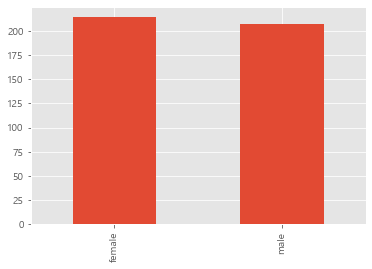

In [10]:
print(raw_df['sex'].unique())
plt.style.use('ggplot')
raw_df['sex'].value_counts().plot.bar()
print(raw_df['sex'].value_counts())

#### birth_year

In [11]:
raw_df['birth_year'].value_counts()

1985.0    24
1956.0    12
1997.0    12
1996.0    11
1962.0    10
          ..
1937.0     1
2007.0     1
2003.0     1
1935.0     1
1932.0     1
Name: birth_year, Length: 76, dtype: int64

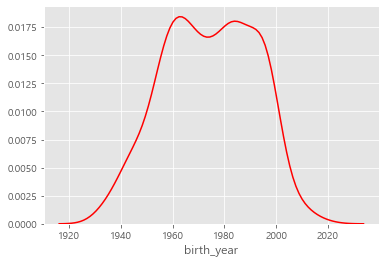

In [13]:
sns.distplot(raw_df['birth_year'],hist=False, color='red')

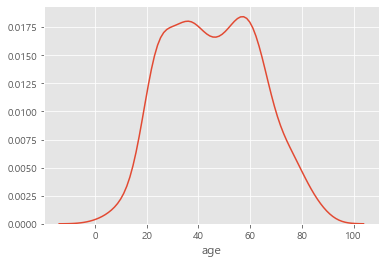

In [14]:
# birth_year 대신 age 컬럼을 새로 만들겠다
# raw_df['birth_year'] = raw_df['birth_year'].astype(float).map(lambda x: x if x>0 else np.nan)
raw_df['age'] = pd.datetime.now().year - raw_df['birth_year']
sns.distplot(raw_df['age'], hist=False)

In [20]:
# raw_df.drop(['birth_year'], axis=1, inplace=True)
raw_df.head(10)

,id,sex,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1.0,female,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0
1,2.0,male,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0
2,3.0,male,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0
3,4.0,male,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0
4,5.0,male,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0
5,6.0,male,Korea,capital area,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaN,released,56.0
6,7.0,male,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,9.0,2020-01-30,2020-02-15,NaN,released,29.0
7,8.0,female,Korea,Jeollabuk-do,NaN,visit to Wuhan,1.0,NaN,113.0,2020-01-31,2020-02-12,NaN,released,63.0
8,9.0,female,Korea,capital area,NaN,contact with patient,2.0,5.0,2.0,2020-01-31,2020-02-24,NaN,released,28.0
9,10.0,female,Korea,capital area,NaN,contact with patient,3.0,6.0,43.0,2020-01-31,2020-02-19,NaN,released,54.0


#### country & region

In [23]:
raw_df.isnull().sum().to_frame().T

,id,sex,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1,5864,2,5876,6202,6139,6250,6215,6235,1,6247,6262,1,5877


In [24]:
print(raw_df['country'].value_counts()); print('------------------------')
print(raw_df['region'].value_counts())
raw_df[['country', 'region']].head()

Korea       6274
China          8
Mongolia       1
Name: country, dtype: int64
------------------------
capital area           191
Gyeongsangbuk-do       122
Daegu                   48
Daejeon                 13
Gwangju                 11
Gangwon-do               5
filtered at airport      4
Jeollabuk-do             3
Jeollanam-do             3
Busan                    2
Jeju-do                  2
Chungcheongbuk-do        2
Ulsan                    2
Chungcheongnam-do        1
Name: region, dtype: int64


,country,region
0,China,filtered at airport
1,Korea,filtered at airport
2,Korea,capital area
3,Korea,capital area
4,Korea,capital area


In [25]:
def region_clean(df):
    if pd.isnull(df):
        return np.nan
    else:
        return df.replace('Gyeongsangbuk-do', 'Gyeongbuk').\
    replace('capital area', 'Capital').replace('Dague', 'Daegu').\
    replace('Gangwon-do', 'Gangwon').replace('Jeollabuk-do', 'Jeonbuk').replace('Jeollanam-do', 'Jeonnam').\
    replace('Jeju-do', 'Jeju').replace('Chungcheongbuk-do', 'Chungcheong').\
    replace('Chungcheongnam-do', 'Chungcheong')
    
raw_df['region'] = raw_df['region'].apply(region_clean)
raw_df['region'].value_counts()

Capital                191
Gyeongbuk              122
Daegu                   48
Daejeon                 13
Gwangju                 11
Gangwon                  5
filtered at airport      4
Jeonnam                  3
Jeonbuk                  3
Chungcheong              3
Jeju                     2
Busan                    2
Ulsan                    2
Name: region, dtype: int64

In [29]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks as cf 
cf.go_offline(connected=True)

raw_df['region'].iplot(kind='hist', linecolor='red')

### group, infection_reason, infection_order, infected_by

In [30]:
raw_df.head()

,id,sex,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1.0,female,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0
1,2.0,male,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0
2,3.0,male,Korea,Capital,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0
3,4.0,male,Korea,Capital,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0
4,5.0,male,Korea,Capital,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0


In [31]:
print(raw_df['group'].value_counts()); print('--------------------')
print(raw_df['infection_reason'].value_counts()); print('------------------')
print(raw_df['infection_order'].value_counts()); print('---------------------')
print(raw_df['infected_by'].value_counts())

Shincheonji Church               53
Eunpyeong St. Mary's Hospital    13
Cheongdo Daenam Hospital          9
Pilgrimage                        6
Myungsung church                  1
Onchun Church                     1
Name: group, dtype: int64
--------------------
contact with patient                 75
visit to Daegu                       43
visit to Wuhan                        8
pilgrimage to Israel                  6
residence in Wuhan                    2
visit to Thailand                     2
contact with patient in Singapore     2
visit to Shincheonji Church           1
visit to Italy                        1
visit to Cheongdo Daenam Hospital     1
visit to China                        1
visit to Japan                        1
visit to Vietnam                      1
contact with patient in Japan         1
 visit to China                       1
Name: infection_reason, dtype: int64
------------------
1.0    13
2.0    10
3.0     6
5.0     3
4.0     2
6.0     1
Name: infection_order

In [32]:
def infection_reason_clean(df):
    if pd.isnull(df):
        return np.nan
    if 'Wuhan' in df:
        return 'Wuhan'
    if 'Daegu' in df:
        return 'Daegu'
    if 'Israel' in df: 
        return 'Abroad'
    if 'Thailand' in df:
        return 'Abroad'
    if 'Singapore' in df:
        return 'Abroad'
    if 'Vietnam' in df:
        return 'Abroad'
    if 'Japan' in df:
        return 'Abroad'
    if 'China' in df:
        return 'Abroad'
    if 'Italy' in df:
        return 'Italy'
    if 'Cheongdo' in df:
        return 'Cheongo Daenam hospital'
    else:
        return df
        
raw_df['infection_reason'] = raw_df['infection_reason'].apply(infection_reason_clean)
raw_df['infection_reason'].value_counts()

contact with patient           75
Daegu                          43
Abroad                         15
Wuhan                          10
visit to Shincheonji Church     1
Cheongo Daenam hospital         1
Italy                           1
Name: infection_reason, dtype: int64

In [35]:
np.nan

nan

Text(0.5, 1.0, 'infection order')

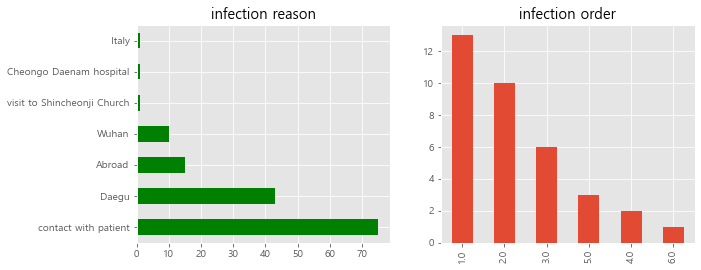

In [37]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(1, 2, 1)
raw_df['infection_reason'].value_counts().plot.barh(color='green')
plt.title('infection reason')
fig.add_subplot(1, 2, 2)
raw_df['infection_order'].value_counts().plot.bar()
plt.title('infection order')

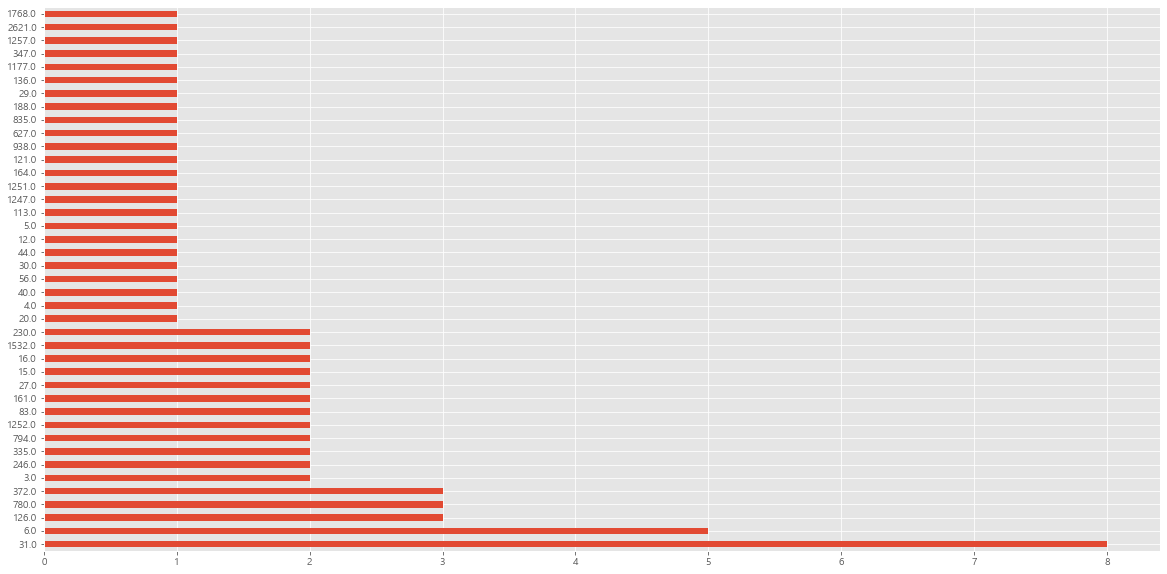

In [38]:
raw_df['infected_by'].value_counts().plot(kind='barh', figsize=(20,10))

#### contact_number, state

In [39]:
print(raw_df['contact_number'].value_counts())
raw_df['contact_number'].value_counts().iplot(kind='bar')

2.0       5
0.0       4
1.0       3
23.0      3
14.0      2
9.0       2
3.0       2
8.0       2
95.0      1
30.0      1
40.0      1
12.0      1
15.0      1
6.0       1
11.0      1
17.0      1
16.0      1
5.0       1
20.0      1
43.0      1
113.0     1
61.0      1
65.0      1
47.0      1
75.0      1
422.0     1
31.0      1
39.0      1
68.0      1
27.0      1
450.0     1
117.0     1
290.0     1
1160.0    1
45.0      1
Name: contact_number, dtype: int64


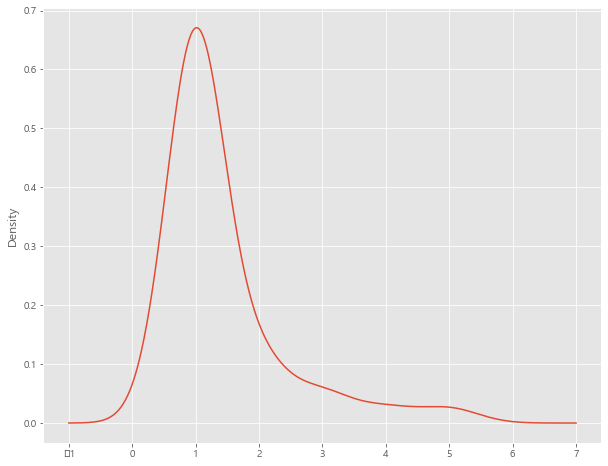

In [42]:
plt.figure(figsize=(10,8))
raw_df['contact_number'].value_counts().plot.kde()

Text(0.5, 1.0, 'state')

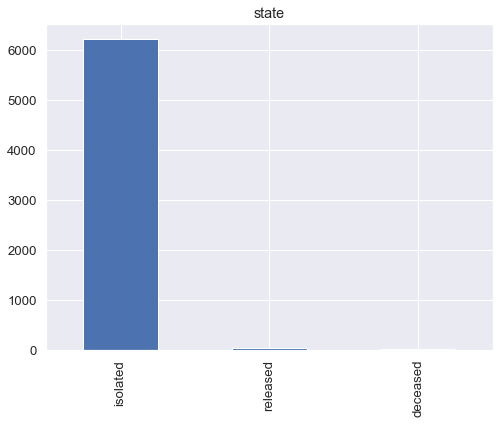

In [43]:
sns.set(font_scale=1.2)
raw_df['state'].value_counts().plot.bar(figsize=(8,6))
plt.title('state')

In [44]:
table = pd.pivot_table(data=raw_df,
               index='id',
              values='contact_number',
              aggfunc='sum')
table = table[table['contact_number'] > 0]
table

,contact_number
id,
1.0,45.0
2.0,75.0
3.0,16.0
4.0,95.0
5.0,31.0
6.0,17.0
7.0,9.0
8.0,113.0
9.0,2.0


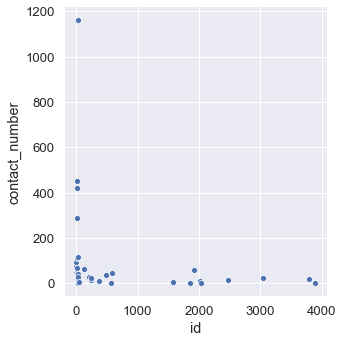

In [45]:
sns.relplot(y='contact_number', x='id', data=table.reset_index())

#### confirmed_date, released_date, deceased_date

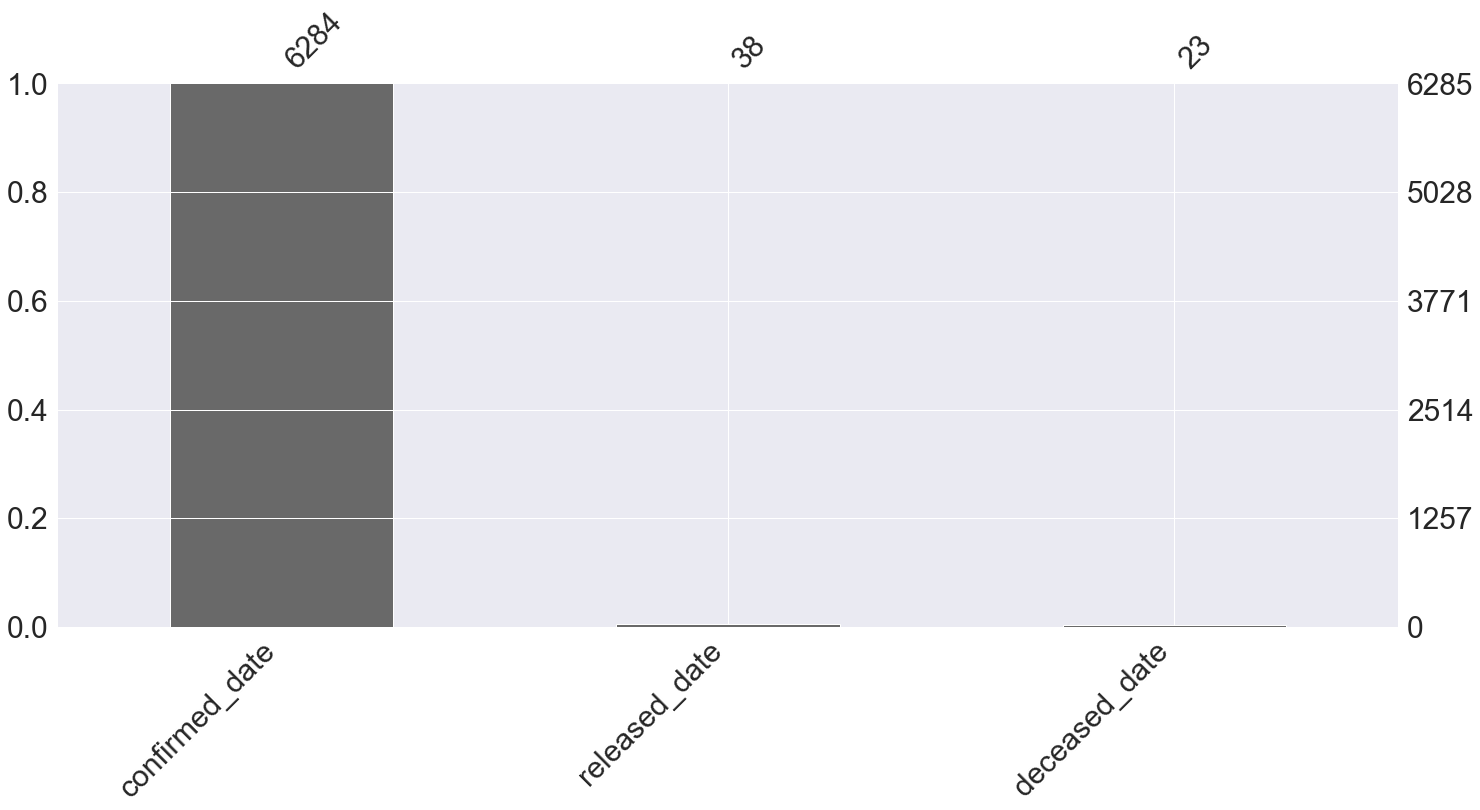

In [48]:
msno.bar(raw_df[['confirmed_date','released_date','deceased_date']],fontsize=30)

In [49]:
# 날짜 데이터 타입으로 변환
raw_df['confirmed_date'] = pd.to_datetime(raw_df['confirmed_date'])
raw_df['released_date'] = pd.to_datetime(raw_df['released_date'])
raw_df['deceased_date'] = pd.to_datetime(raw_df['deceased_date'])
raw_df.dtypes

id                         float64
sex                         object
country                     object
region                      object
group                       object
infection_reason            object
infection_order            float64
infected_by                float64
contact_number             float64
confirmed_date      datetime64[ns]
released_date       datetime64[ns]
deceased_date       datetime64[ns]
state                       object
age                        float64
dtype: object

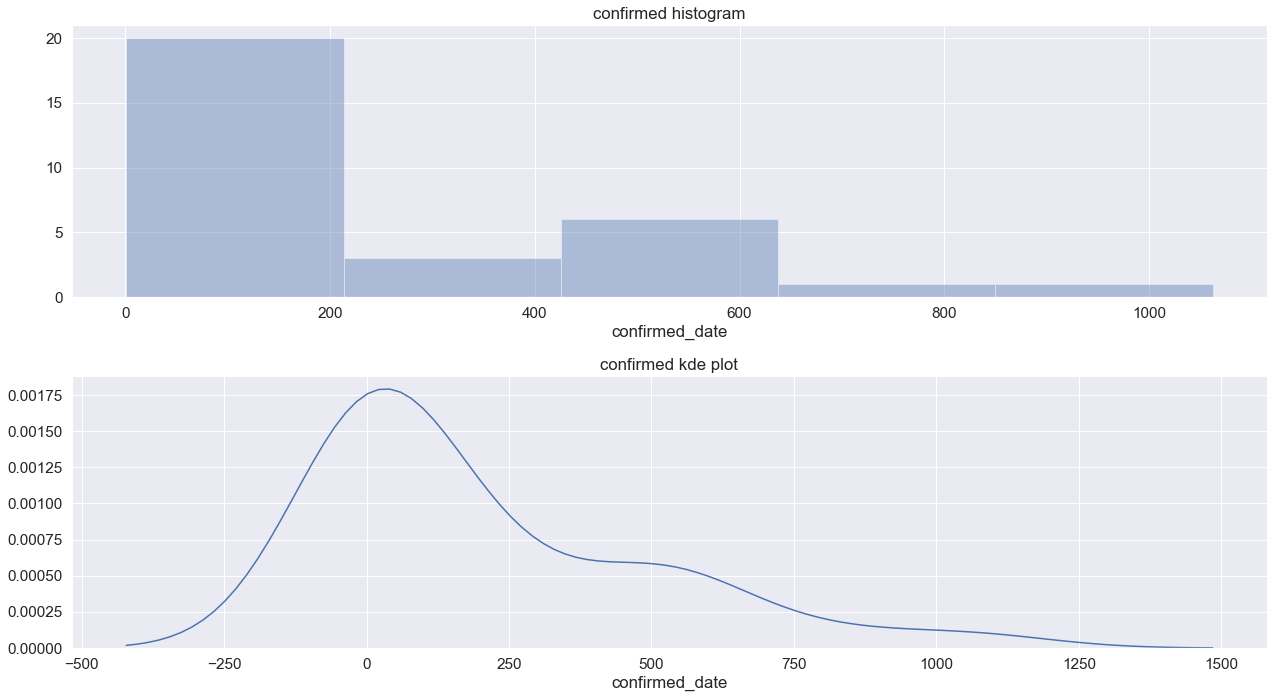

In [52]:
sns.set(font_scale=1.4)
# plt.rc('font', family='Malgun Gothic')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,10))
sns.distplot(raw_df['confirmed_date'].value_counts(), kde=False, ax=ax1)
sns.distplot(raw_df['confirmed_date'].value_counts(), bins=3, hist=False, ax=ax2)
ax1.set_title('confirmed histogram')
ax2.set_title('confirmed kde plot')
plt.tight_layout()

### 컬럼 순서 변경

In [53]:
raw_df.head()

,id,sex,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1.0,female,China,filtered at airport,NaN,Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaT,released,36.0
1,2.0,male,Korea,filtered at airport,NaN,Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released,56.0
2,3.0,male,Korea,Capital,NaN,Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released,54.0
3,4.0,male,Korea,Capital,NaN,Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released,56.0
4,5.0,male,Korea,Capital,NaN,Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaT,released,33.0


In [55]:
raw_df.columns.tolist()

['id',
 'sex',
 'country',
 'region',
 'group',
 'infection_reason',
 'infection_order',
 'infected_by',
 'contact_number',
 'confirmed_date',
 'released_date',
 'deceased_date',
 'state',
 'age']

In [59]:
col = raw_df.columns[[0,12,13,1,2,3,9,10,11,4,5,7,8,6]]
df = raw_df[col].copy()
print(df.shape)
df.head()

(6285, 14)


,id,state,age,sex,country,region,confirmed_date,released_date,deceased_date,group,infection_reason,infected_by,contact_number,infection_order
0,1.0,released,36.0,female,China,filtered at airport,2020-01-20,2020-02-06,NaT,NaN,Wuhan,NaN,45.0,1.0
1,2.0,released,56.0,male,Korea,filtered at airport,2020-01-24,2020-02-05,NaT,NaN,Wuhan,NaN,75.0,1.0
2,3.0,released,54.0,male,Korea,Capital,2020-01-26,2020-02-12,NaT,NaN,Wuhan,NaN,16.0,1.0
3,4.0,released,56.0,male,Korea,Capital,2020-01-27,2020-02-09,NaT,NaN,Wuhan,NaN,95.0,1.0
4,5.0,released,33.0,male,Korea,Capital,2020-01-30,2020-03-02,NaT,NaN,Wuhan,NaN,31.0,1.0


In [61]:
#df.to_csv('./data/corona(kaggle)_update_data.csv')

## 추이


In [62]:
len(df.id.unique())

6285

In [63]:
confirm = pd.pivot_table(data=df,
                        index='confirmed_date',
                        values='id',
                        aggfunc=len)
confirm.rename(columns={'id':'count'}, inplace=True)
confirm

,count
confirmed_date,
2020-01-20,1.0
2020-01-24,1.0
2020-01-26,1.0
2020-01-27,1.0
2020-01-30,3.0
2020-01-31,4.0
2020-02-01,1.0
2020-02-02,3.0
2020-02-04,1.0


In [65]:
confirm.iplot(kind='line',
             xTitle='날짜',
             yTitle='확진자수',
             title='확진자 추이',
             theme=cf.set_config_file(theme='solar'))

Text(0.5, 0, '2020.01.26~2020.03.04')

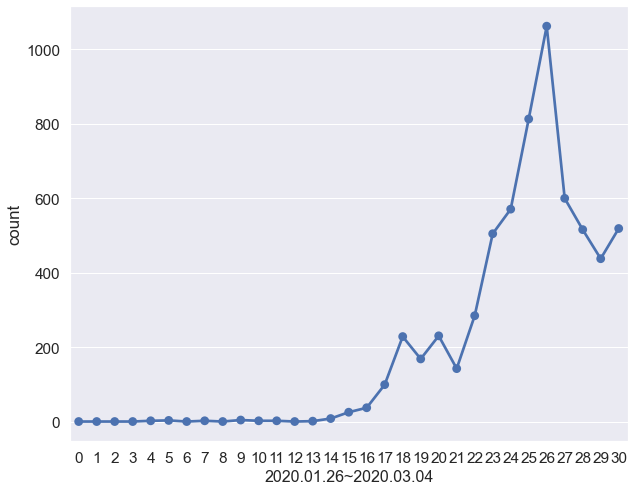

In [66]:
plt.figure(figsize=(10,8))
sns.pointplot(data=confirm.reset_index(), x=np.arange(len(confirm.reset_index()['confirmed_date'])), y='count')
plt.xlabel('2020.01.26~2020.03.04',
          fontdict={'size':16})

In [83]:
release = df.groupby('released_date')['id'].count().to_frame()
decease = df.groupby('deceased_date')['id'].count().to_frame()

In [85]:
confirm_reset = confirm.reset_index()
release_reset = release.reset_index()
decease_reset = decease.reset_index()
data_merged = confirm_reset.merge(release_reset,
                    how='inner',
                    left_on='confirmed_date',
                    right_on='released_date', ).\
merge(decease_reset,
     how='inner', left_on='released_date', right_on='deceased_date')

data_merged.drop(columns=['released_date', 'deceased_date'], axis=1, inplace=True)
data_merged.columns = ['date', 'confirmed', 'released', 'deceased']
data_merged

,date,confirmed,released,deceased
0,2020-02-19,26.0,4,1
1,2020-02-21,100.0,1,1
2,2020-02-24,231.0,4,2
3,2020-02-26,285.0,2,1
4,2020-02-27,505.0,4,1
5,2020-03-01,1062.0,1,3
6,2020-03-02,600.0,3,3
7,2020-03-03,516.0,2,1
8,2020-03-04,438.0,2,3


In [87]:
data_merged.set_index('date').iplot(kind='box')

In [88]:
data_merged.set_index('date').iplot(kind='barh')

In [90]:
cf.set_config_file(theme='ggplot')
data_merged.set_index('date').iplot(kind='surface')

In [91]:
data_merged.set_index('date').iplot(kind='spread')

### 확진자 예측

In [93]:
confirm.cumsum()

,count
confirmed_date,
2020-01-20,1.0
2020-01-24,2.0
2020-01-26,3.0
2020-01-27,4.0
2020-01-30,7.0
2020-01-31,11.0
2020-02-01,12.0
2020-02-02,15.0
2020-02-04,16.0


Text(0.5, 1.0, 'confirmed Cumulative trend')

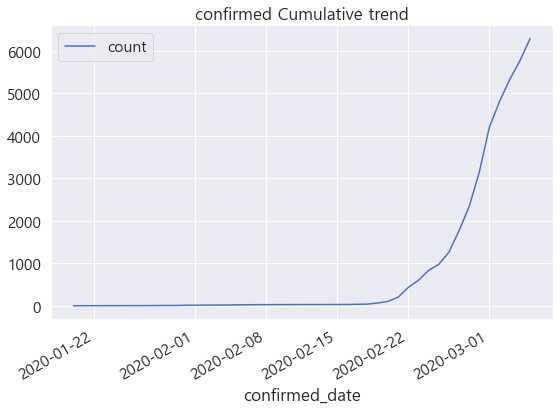

In [92]:
plt.rc('font', family='Malgun Gothic')
confirm.cumsum().plot(figsize=(9,6))
plt.title('confirmed Cumulative trend')

- ARIMA로 예측해보기

In [96]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

confirm_cumsum = confirm.cumsum()
# confirm_cumsum = confirm_cumsum['count'].astype(float).to_frame()
confirm_cumsum.tail()

,count
confirmed_date,
2020-03-01,4211.0
2020-03-02,4811.0
2020-03-03,5327.0
2020-03-04,5765.0
2020-03-05,6284.0


In [110]:
model = ARIMA(confirm_cumsum['count'].values, order=(1,2,1))
fit_model = model.fit(trend='c', full_output=True, disp=True)
fit_model.summary()
# 계수들의 p-value 값이 유의수준 0.05보다 작음. AR=1, MA=1, 차분=2로 설정하는 것 유의미하다고 보여짐.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                   29
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -181.122
Method:                       css-mle   S.D. of innovations            124.780
Date:                Thu, 26 Nov 2020   AIC                            370.245
Time:                        16:39:33   BIC                            375.714
Sample:                             2   HQIC                           371.957
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0784     24.068      0.751      0.453     -29.093      65.250
ar.L1.D2.y    -0.4869      0.950     -0.513      0.608      -2.348       1.374
ma.L1.D2.y     0.5451      0.909      0.600      0.549      -1.236       2.327
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0536           +0.0000j            2.0536            0.5000
MA.1           -1.8344           +0.0000j            1.8344            0.5000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'Error Variation of Actual and Predicted Values')

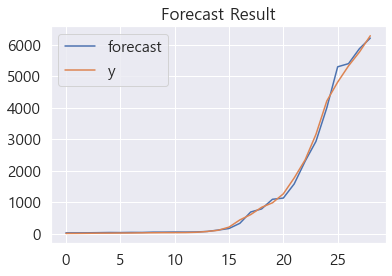

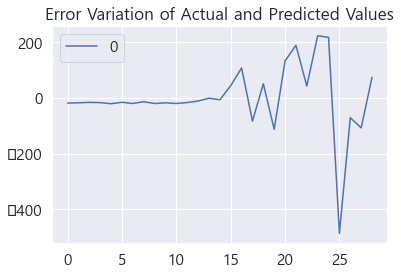

In [111]:
plt.rc('font', family='Malgun Gothic')
fit_model.plot_predict()
plt.title('Forecast Result')
pd.DataFrame(fit_model.resid).plot()
plt.title('Error Variation of Actual and Predicted Values')

- 이 ARIMA 모델로 3월 5일부터 10일까지 누적 확진자 수 예측

In [112]:
forcast = fit_model.forecast(steps=6)
pred_y = forcast[0].tolist()
pred_y

[6831.1102540436395,
 7391.414032618193,
 7972.174915116658,
 8569.855960981564,
 9186.179454479416,
 9820.30674337774]

In [119]:
forcast

(array([6831.11025404, 7391.41403262, 7972.17491512, 8569.85596098,
        9186.17945448, 9820.30674338]),
 array([ 124.77951745,  285.52851877,  479.58519886,  704.12749568,
         954.85238591, 1229.61767752]),
 array([[ 6586.54689384,  7075.67361424],
        [ 6831.78841927,  7951.03964596],
        [ 7032.20519782,  8912.14463241],
        [ 7189.79142893,  9949.92049303],
        [ 7314.70316755, 11057.65574141],
        [ 7410.30038069, 12230.31310606]]))

In [118]:
pd.DataFrame(data=pred_y,
             index=['3/5', '3/6', '3/7', '3/8', '3/9', '3/10'],
            columns=['confirmed_count(cumsum)'])

,confirmed_count(cumsum)
3/5,6831.110254
3/6,7391.414033
3/7,7972.174915
3/8,8569.855961
3/9,9186.179454
3/10,9820.306743
